**Deep Neural Networks and Comparative analysis of optimizer performance**

# 1. Import the required libraries

In [1]:
##---------Type the code below this line------------------##
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import models
from tensorflow.keras import layers

# 2. Data Acquisition & Data Preparation

##Image Classification using CNN · Intel Image Classification
This Data contains around 25k images of size 150x150 distributed under 6 categories.
{'buildings' -> 0,
'forest' -> 1,
'glacier' -> 2,
'mountain' -> 3,
'sea' -> 4,
'street' -> 5 }

The Train, Test and Prediction data is separated in each files.

There are around 14k images in Train, 3k in Test and 7k in Prediction.

This data was initially published on https://datahack.analyticsvidhya.com by Intel to host a Image classification Challenge.


Found 14034 images belonging to 6 classes.


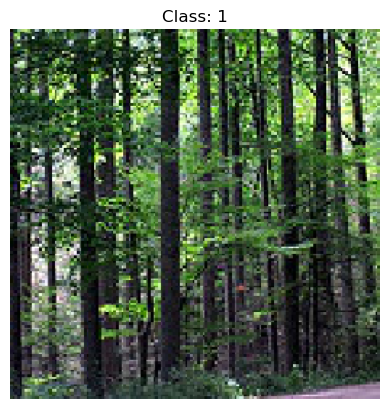

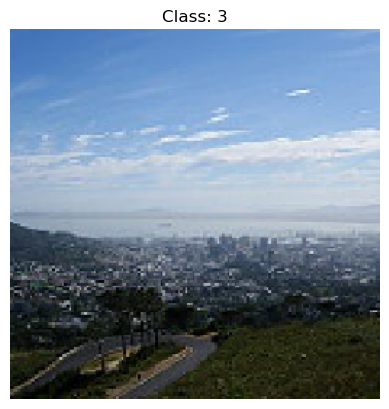

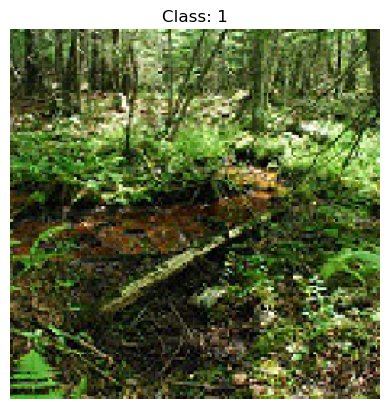

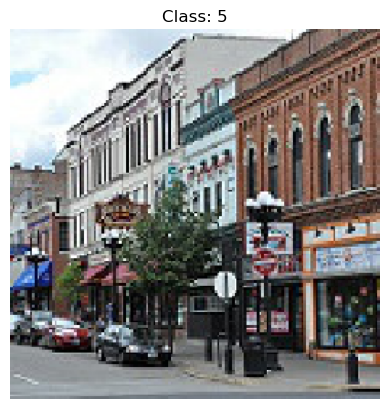

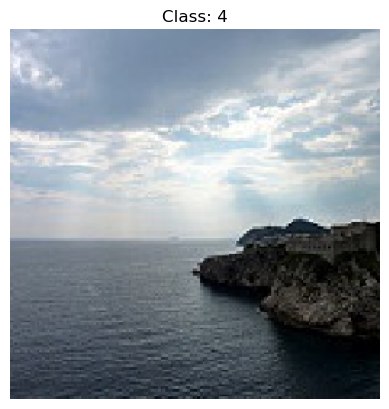

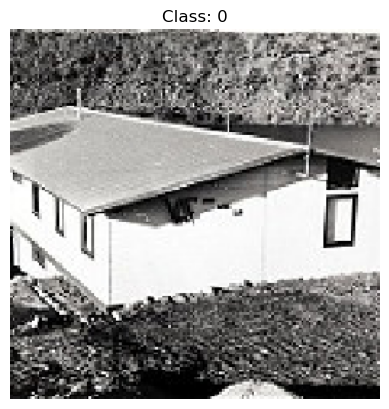

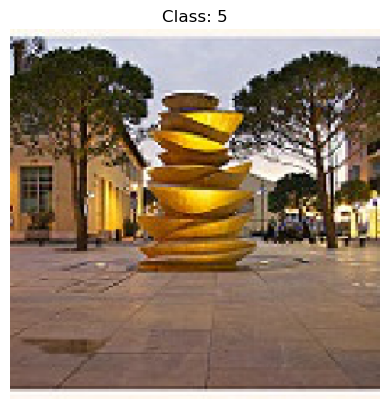

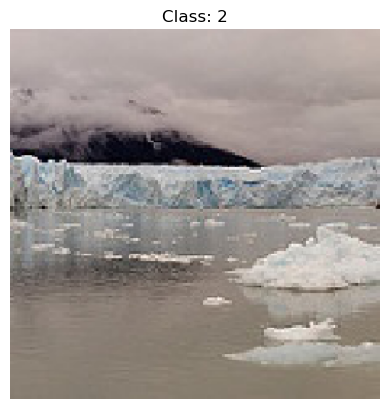

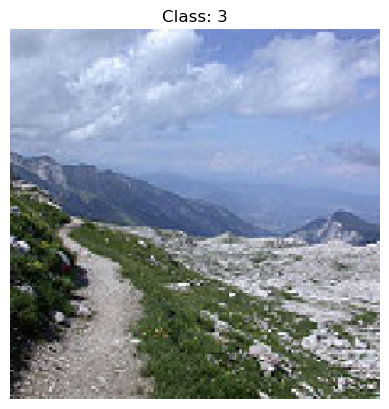

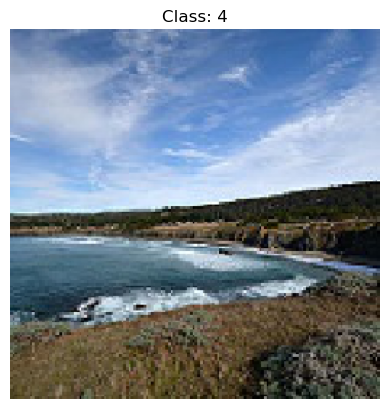

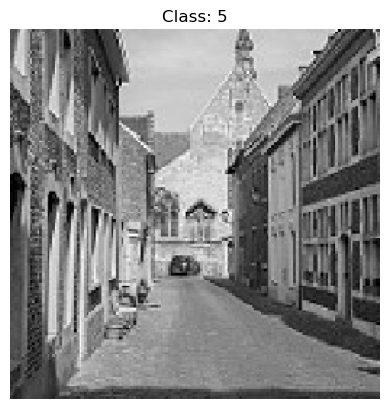

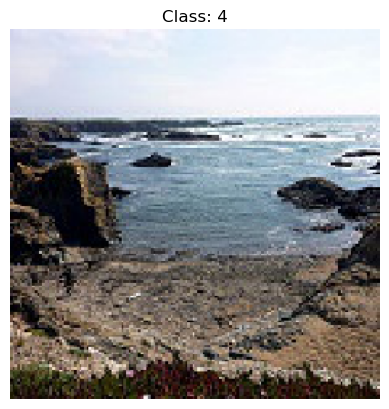

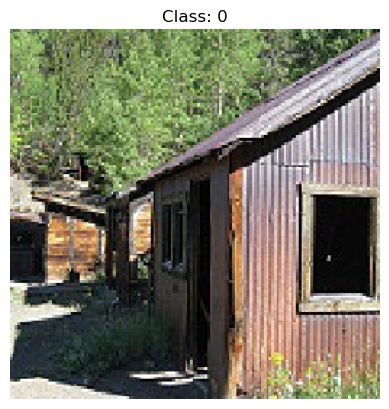

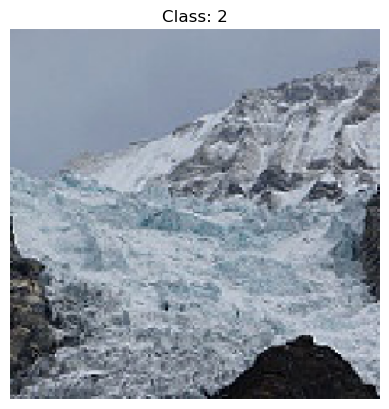

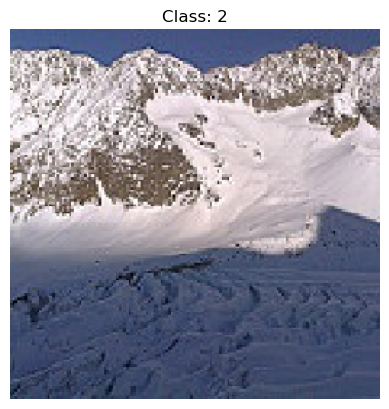

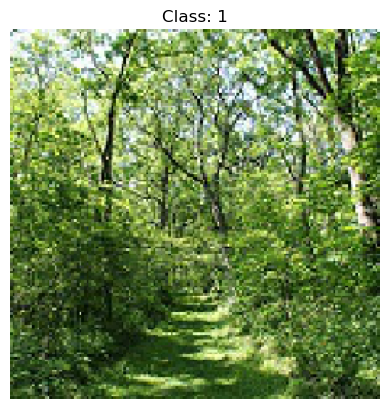

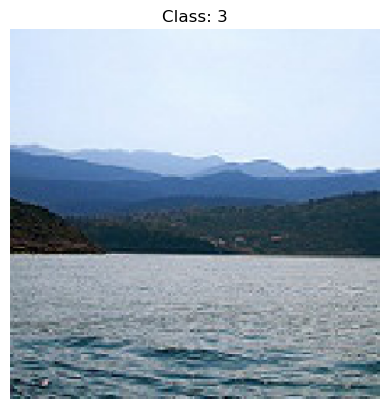

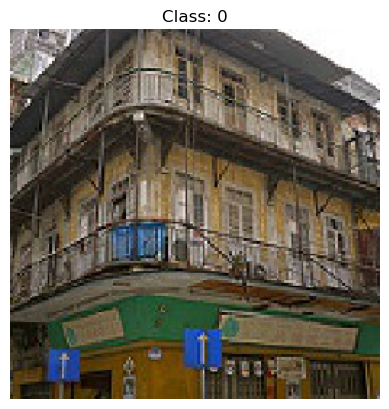

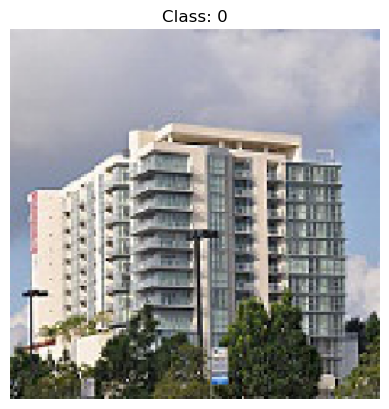

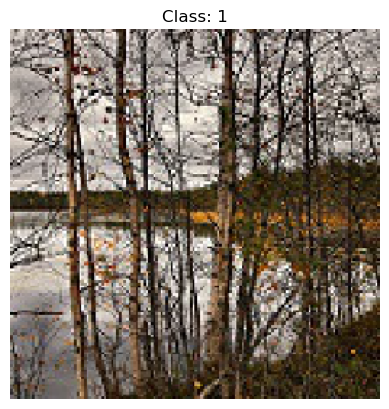

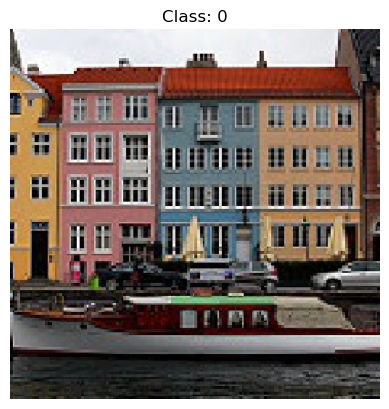

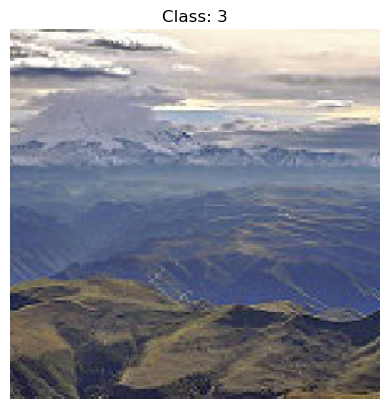

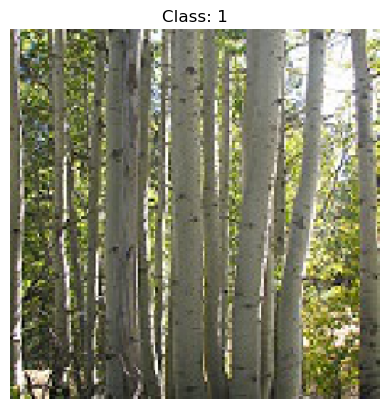

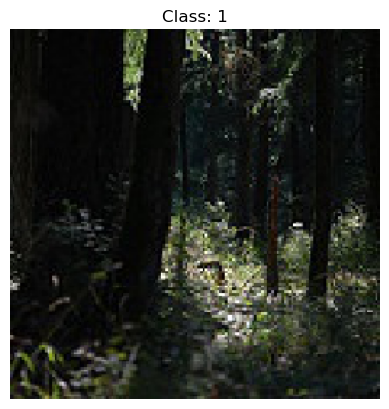

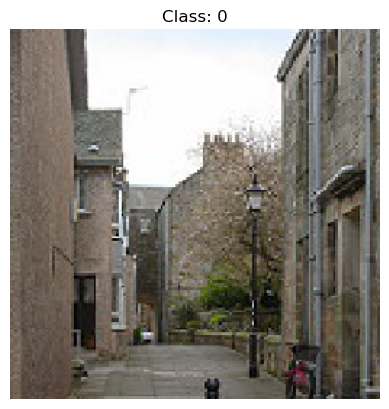

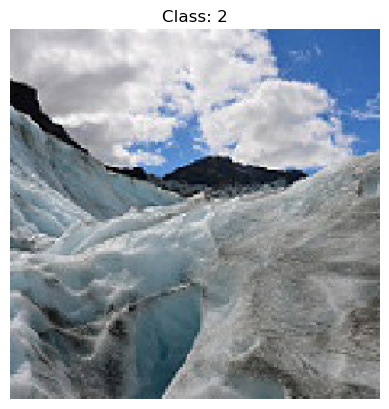

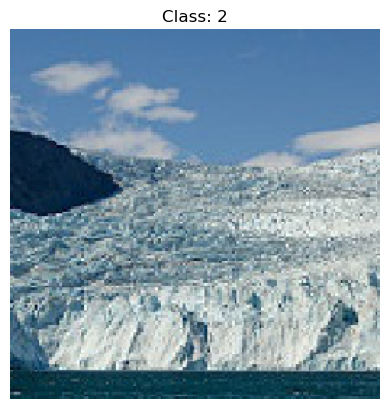

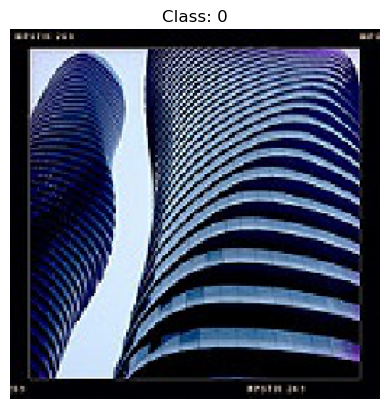

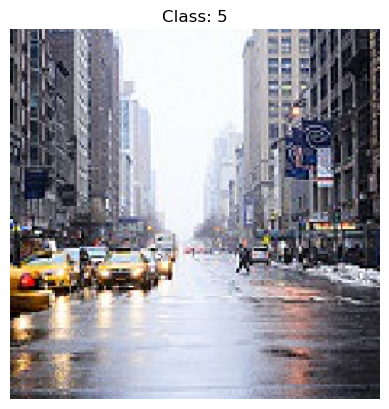

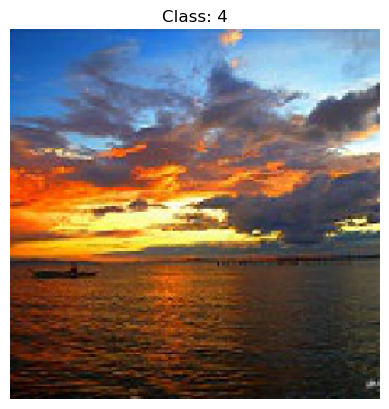

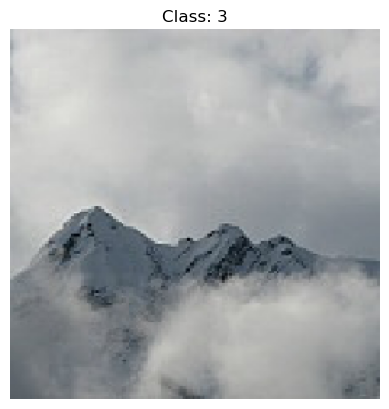

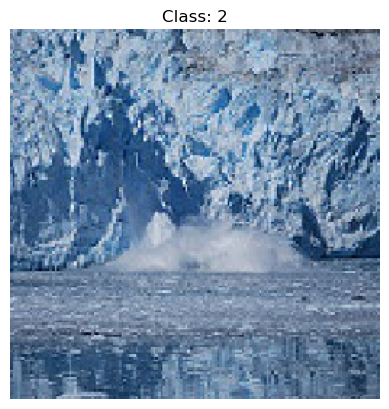

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    directory='####Provide the path for your dataset',
    target_size=(255, 255),
    color_mode="rgb",
    batch_size=32,
    class_mode='categorical'
)
# Get a batch of images and labels
images, labels = next(train_generator)

# Display the images
for i in range(len(images)):
    plt.imshow(images[i])  # Display the image
    plt.title(f"Class: {np.argmax(labels[i])}")  # Title with class label
    plt.axis('off')  # Hide axes for a cleaner display
    plt.show()

## 4. Deep Neural Network Architecture
## 4.1 Design the architecture that you will be using CNN

In [3]:
# Define the CNN model
model = Sequential()

# First Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(255, 255, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Fourth Convolutional Layer
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten the results to feed into a Dense Layer
model.add(layers.Flatten())

# Dense layer with 256 neurons
model.add(layers.Dense(256, activation='relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Output layer with 'n' classes (use `softmax` for multi-class classification)
n_classes = train_generator.num_classes  # Get number of classes from the generator
model.add(layers.Dense(n_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary to view the structure
model.summary()

C:\Users\prosh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 253, 253, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,235,270 (50.49 MB)

 Trainable params: 13,235,270 (50.49 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
val_generator = val_datagen.flow_from_directory(
    directory='C:/Users/prosh/OneDrive/Desktop/DNN Assignment II/seg_data/seg_test',
    target_size=(255, 255),
    color_mode="rgb",
    batch_size=32,
    class_mode='categorical'
)

Found 3000 images belonging to 6 classes.


# 5. Training the model


In [5]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # You can adjust the number of epochs
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)


Epoch 1/10


C:\Users\prosh\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


438/438 ━━━━━━━━━━━━━━━━━━━━ 687s 2s/step - accuracy: 0.4792 - loss: 1.3024 - val_accuracy: 0.6593 - val_loss: 0.8320
Epoch 2/10
  1/438 ━━━━━━━━━━━━━━━━━━━━ 28:27 4s/step - accuracy: 0.6562 - loss: 1.1411

C:\Users\prosh\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6562 - loss: 1.1411 - val_accuracy: 0.7500 - val_loss: 0.7745
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 841s 2s/step - accuracy: 0.6721 - loss: 0.8680 - val_accuracy: 0.7503 - val_loss: 0.6603
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8438 - loss: 0.5406 - val_accuracy: 0.7500 - val_loss: 0.5095
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 650s 1s/step - accuracy: 0.7611 - loss: 0.6649 - val_accuracy: 0.7507 - val_loss: 0.6611
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8125 - loss: 0.5913 - val_accuracy: 0.8333 - val_loss: 0.7925
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 659s 2s/step - accuracy: 0.7989 - loss: 0.5681 - val_accuracy: 0.8162 - val_loss: 0.5101
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8438 - loss: 0.4042 - val_accuracy: 0.7917 - val_loss: 0.3795
Epoch 9/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 607s 1s/step - accuracy: 0.8400 - loss: 0.4445 - val_accuracy: 0.7991 - 

In [6]:
# Save the trained model
model.save('cnn_image_classifier_trained.h5')

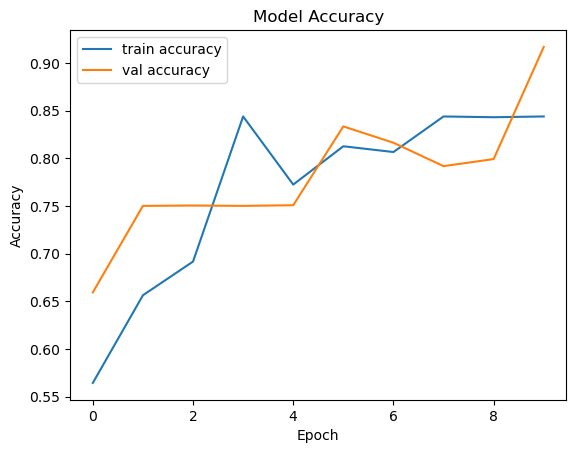

In [7]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

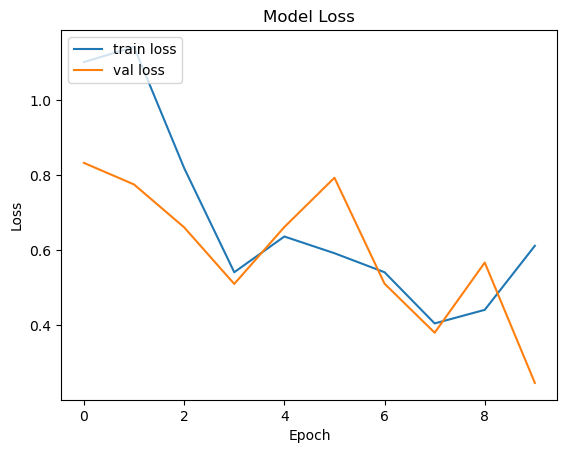

In [8]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

# 6. Test the model


In [9]:
# Load the trained model
model = tf.keras.models.load_model('cnn_image_classifier_trained.h5')

In [10]:
# Evaluate the model on the test dataset
test_generator = test_datagen.flow_from_directory(
    'C:/Users/prosh/OneDrive/Desktop/DNN Assignment II/seg_data/seg_test',
    target_size=(255, 255),
    color_mode="rgb",
    batch_size=32,  # Same batch size as used during training
    class_mode='categorical',
    shuffle=False  # Set shuffle to False to maintain data order
)

# Get the test loss and accuracy
test_loss, test_accuracy = model.evaluate(test_generator)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Found 3000 images belonging to 6 classes.
94/94 ━━━━━━━━━━━━━━━━━━━━ 32s 333ms/step - accuracy: 0.8291 - loss: 0.4849
Test Loss: 0.5069467425346375
Test Accuracy: 0.824999988079071
